In [1]:
%load_ext autoreload
%autoreload 2
from autoseg.datasets import get_dataset_path
from autoseg.config import read_config
from autoseg.models import Model
import zarr
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import functools
import gunpowder as gp
from gunpowder.nodes.add_affinities import seg_to_affgraph
from autoseg.datasets import GunpowderZarrDataset

/home/anton/miniforge3/envs/segmentation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [91]:
config = read_config("autoseg/user_configs/anton/resolution_experiments/s1")
dataset = GunpowderZarrDataset(
  config=config["pipeline"],
  input_image_shape=(40, 24, 24),
  output_image_shape=(40, 24, 24)
)

/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels_mask/s0
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels/s0
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip raw/s0


In [102]:
dataset_iter = iter(dataset)
for it in dataset_iter:
  first = it
  break
raw, labels, gt_affs, affs_weights, gt_affs_mask, labels_mask = first
#     _outputs: ["RAW", "LABELS", "GT_AFFS", "AFFS_WEIGHTS", "GT_AFFS_MASK", "LABELS_MASK"],
affs = 1 - gt_affs[:,20]

In [118]:
affs = 1-affs

In [148]:
from skimage.color import label2rgb
import matplotlib.colors as mcolors
# Generate a list of random colors for each unique label
unique_labels = np.unique(labels)
random_colors = np.random.rand(len(unique_labels), 3)
cmap = mcolors.ListedColormap(['black', 'yellow', 'magenta', 'white'])

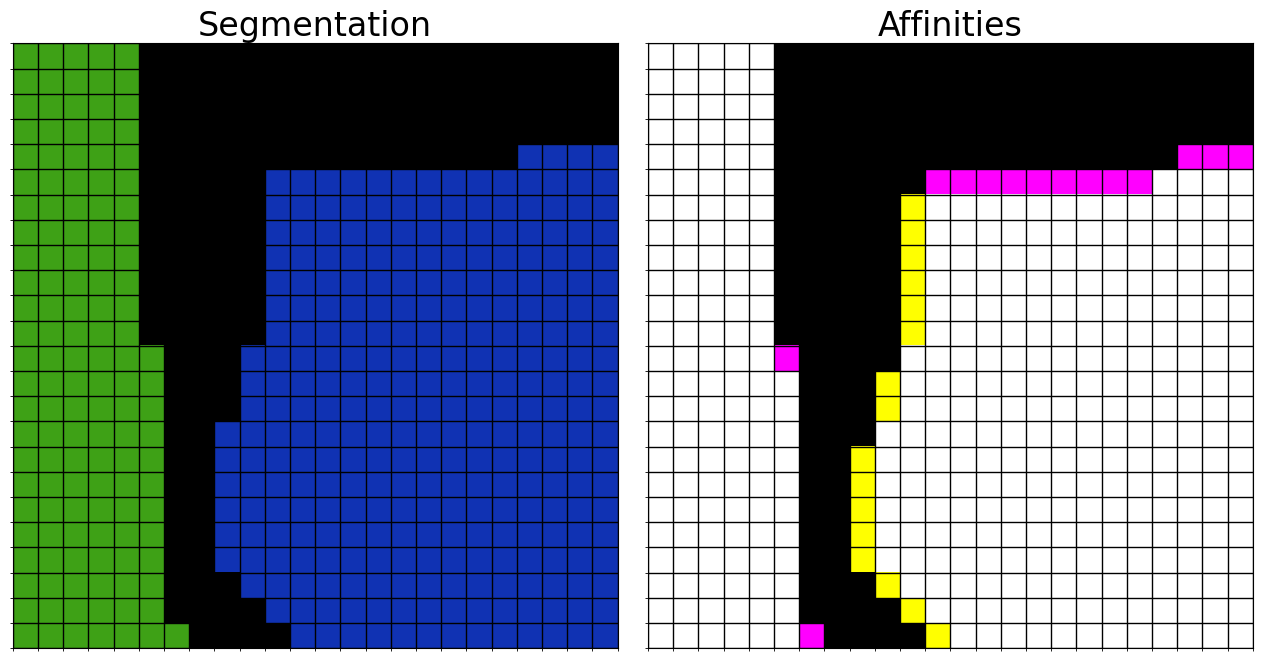

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

plt.subplots_adjust(wspace=0.05, hspace=0.3)
title_fontsize=24

# Row 1: Raw tensor and Labels tensor
# axes[0].imshow(raw[0, 20], cmap="gray")
# axes[0].set_title('Raw', fontsize=title_fontsize)
# axes[0].axis('off')

axes[0].imshow(label2rgb(labels[20],bg_label=0,colors=random_colors), origin="upper")
axes[0].set_title('Segmentation', fontsize=title_fontsize)
axes[0].axis('off')

# Row 3: Original LSD slices
axes[1].imshow(affs[1] + (affs[2] << 1), cmap=cmap, interpolation="nearest", origin="upper")
axes[1].set_title('Affinities', fontsize=title_fontsize)

def add_pixel_borders(ax):
  # Set axis on and enable grid
  ax.set_xticks(np.arange(-0.5, 24), minor=True)
  ax.set_yticks(np.arange(-0.5, 24), minor=True)
  ax.grid(color="black", which="minor", linestyle='-', linewidth=1)
  ax.axis('on')  # Make sure the axis is on

  for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

  for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

add_pixel_borders(axes[0])
plt.gca().invert_xaxis()
add_pixel_borders(axes[1])
plt.gca().invert_xaxis()
# Row 2: Original LSD slices
# axes[3].imshow(affs[0])
# axes[3].set_title('Affs', fontsize=title_fontsize)
# axes[3].axis('off')
# 
# axes[4].imshow(affs[1])
# axes[4].set_title('Affs', fontsize=title_fontsize)
# axes[4].axis('off')
# 
# axes[5].imshow(affs[2])
# axes[5].set_title('Affs', fontsize=title_fontsize)
# axes[5].axis('off')


#axes[1, 1].imshow(lsd[3:6, 20].transpose(1, 2, 0))
#axes[1, 1].set_title('LSD[3:6]', fontsize=title_fontsize)
#axes[1, 1].axis('off')
#
#axes[1, 2].imshow(lsd[6:9, 20].transpose(1, 2, 0))
#axes[1, 2].set_title('LSD[6:9]', fontsize=title_fontsize)
#axes[1, 2].axis('off')

#
#axes[1, 3].imshow(lsd[9:10, 20].transpose(1, 2, 0), cmap="jet")
#axes[1, 3].set_title('LSD[9:10]', fontsize=title_fontsize)
#axes[1, 3].axis('off')

plt.show()

# magenta means pixel above belongs to border
# yellow means pixel to the left belongs to border
# black means pixel above and to the left belongs to border
